<a href="https://colab.research.google.com/github/urpey/python-web-scraping-project/blob/main/web_scraping_for_vacuum_cleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Make the HTTP request
url = "https://www.amazon.ca/s"

querystring = {"k":"vacuum+cleaners","rh":"p_n_deal_type:23565506011","dc":""}

payload = ""
headers = {
    "cookie": "session-id=138-2778052-3318517; session-id-time=2082787201l; i18n-prefs=CAD; ubid-acbca=131-6545452-1922762; session-token=AeQJAKQin4JCNE1NFVIXnIDMxnEcij%2Fzi7vBVw2PAAbvJIsv14Cf4%2BtNHKUxWzWAlNNYk9OOs4K%2FYAy3gdoa63Hb6OuML2XG587xYFgIPbcp2oSPmu0Jc%2Fi0Q2WcU3fUuRB97vm9WSeKOZqu%2Bux7sxme8jIYpQsxc5teLJ%2F1A%2BzJg5PvRkDbdVwGCrkX6I5%2FUiNXyipP%2Bs%2B7CHUwGc6PAPnexVBoSukzGciRhNdE9GKQULW8SA%2FT6ezO6XogmZyT2fWKw7065mkKf04Xmv%2BnG1mj0mn2qNykLc389QWxYmnVeay1uBoVMw%2FpECWps5wVxJBclEPDJaYf1KQjyBtU7yS4WrM2geYT",
    "User-Agent": "insomnia/2023.5.8"
}

response = requests.request("GET", url, data=payload, headers=headers, params=querystring)


In [39]:
# Parse the HTML content with Beautiful Soup
soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
for element in soup(['script', 'style', 'comment']):
  element.extract()

# Extract the visible text
# Extracting information from page
products = soup.find_all('div', {'class':'sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20'})

def find_product_detail(products):
  result = []
  for product in products:
    product_title = product.find_all('span', {'class':'a-size-base-plus a-color-base a-text-normal'})
    product_rating = product.find_all('span', {'class':'a-icon-alt'})
    product_price = product.find_all('span', {'class':'a-offscreen'})
    product_discount_price = product_price[0].text.replace("$",'')
    product_raw_price = product_price[1].text .replace("$",'')
    product_rating = product_rating[0].text.replace(' out of 5 stars', '')
    product_title = product_title[0].text.split(',')[0]
    result.append({
        "product_title": product_title,
        "product_rating": product_rating,
        "product_raw_price": product_raw_price,
        "product_discount_price": product_discount_price
    })

  return result


In [40]:
#Run to get the required data
processed_products_list = find_product_detail(products)

In [153]:
df = pd.DataFrame(processed_products_list)

df['product_discount_price'] = df['product_discount_price'].astype(float)
df['product_raw_price'] = df['product_raw_price'].astype(float)
df['product_rating'] = df['product_rating'].astype(float)
#get discount rate
df['discount_rate'] = df['product_discount_price']/ df['product_raw_price']
#Classify vacuum kinds
df['handheld'] = df['product_title'].apply(lambda x: False if 'Handheld' not in x else True  )
df['cordless'] = df['product_title'].apply(lambda x: False if 'Cordless' not in x else True )
df['robot'] = df['product_title'].apply(lambda x: False if 'Robot' not in x else True  )
#To Keep the plot readibility, only crop 50 chars for product name
df['product_title'] = df['product_title'].apply(lambda x: x[:50]  )


#only selecting high rating products
df = df[df['product_rating'] >= 4.0]

# with lowest discount price, highest rate and highest discount rate
df.sort_values(['product_discount_price', 'product_rating', 'discount_rate'], ascending=[True, False, True], inplace=True)
df


,product_title,product_rating,product_raw_price,product_discount_price,discount_rate,handheld,cordless,robot
19,Handheld Vacuum Cleaner,4.4,34.99,28.79,0.822807,True,False,False
31,Handheld Vacuum Cleaner 9000Pa 130W Powerful C...,4.3,39.99,29.99,0.749937,True,True,False
42,Oraimo Handheld Vacuum Cordless,4.1,39.99,31.99,0.799950,True,True,False
20,Fityou Handheld Vacuum Cleaner Cordless,4.0,59.99,35.99,0.599933,True,True,False
40,Caseeto Handheld Vacuum Cleaner,4.5,47.88,37.99,0.793442,True,False,False
25,Caseeto Handheld Vacuum,4.6,55.88,41.27,0.738547,True,False,False
41,Litheli Cordless Handheld Vacuum,4.3,59.99,49.99,0.833306,True,True,False
21,Electric Compressed Air Duster & Vacuum,4.3,103.99,83.59,0.803827,False,False,False
17,Laresar Cordless Vacuum Cleaner,4.0,119.90,107.91,0.900000,False,True,False
3,Cordless Vacuum Cleaner - 28 Kpa Powerful Suct...,4.2,189.99,109.99,0.578925,False,True,False


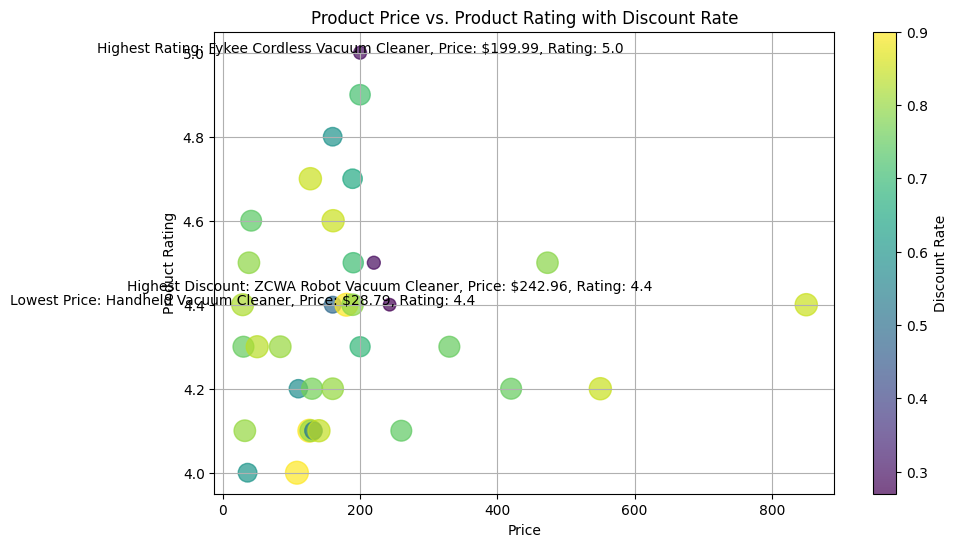

In [154]:
# Plot the scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(df['product_discount_price'], df['product_rating'], s=df['discount_rate']*300, alpha=0.7, c=df['discount_rate'], cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Product Rating')
plt.title('Product Price vs. Product Rating with Discount Rate')
plt.colorbar(label='Discount Rate')
plt.grid(True)

# Find the product with the lowest price, highest rating, and highest discount rate
lowest_price_product = df[df['product_discount_price'] == df['product_discount_price'].min()]
highest_rating_product = df[df['product_rating'] == df['product_rating'].max()]
highest_discount_product = df[df['discount_rate'] == df['discount_rate'].min()]

# Annotate the points for these products on the plot
for product, x, y in zip(lowest_price_product['product_title'], lowest_price_product['product_discount_price'], lowest_price_product['product_rating']):
    plt.annotate(f'Lowest Price: {product}, Price: ${x}, Rating: {y}', (x, y), textcoords="offset points", xytext=(0, 0), ha='center')

for product, x, y in zip(highest_rating_product['product_title'], highest_rating_product['product_discount_price'], highest_rating_product['product_rating']):
    plt.annotate(f'Highest Rating: {product}, Price: ${x}, Rating: {y}', (x, y), textcoords="offset points", xytext=(0, 0), ha='center')

for product, x, y in zip(highest_discount_product['product_title'], highest_discount_product['product_discount_price'], highest_discount_product['product_rating']):
    plt.annotate(f'Highest Discount: {product}, Price: ${x}, Rating: {y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

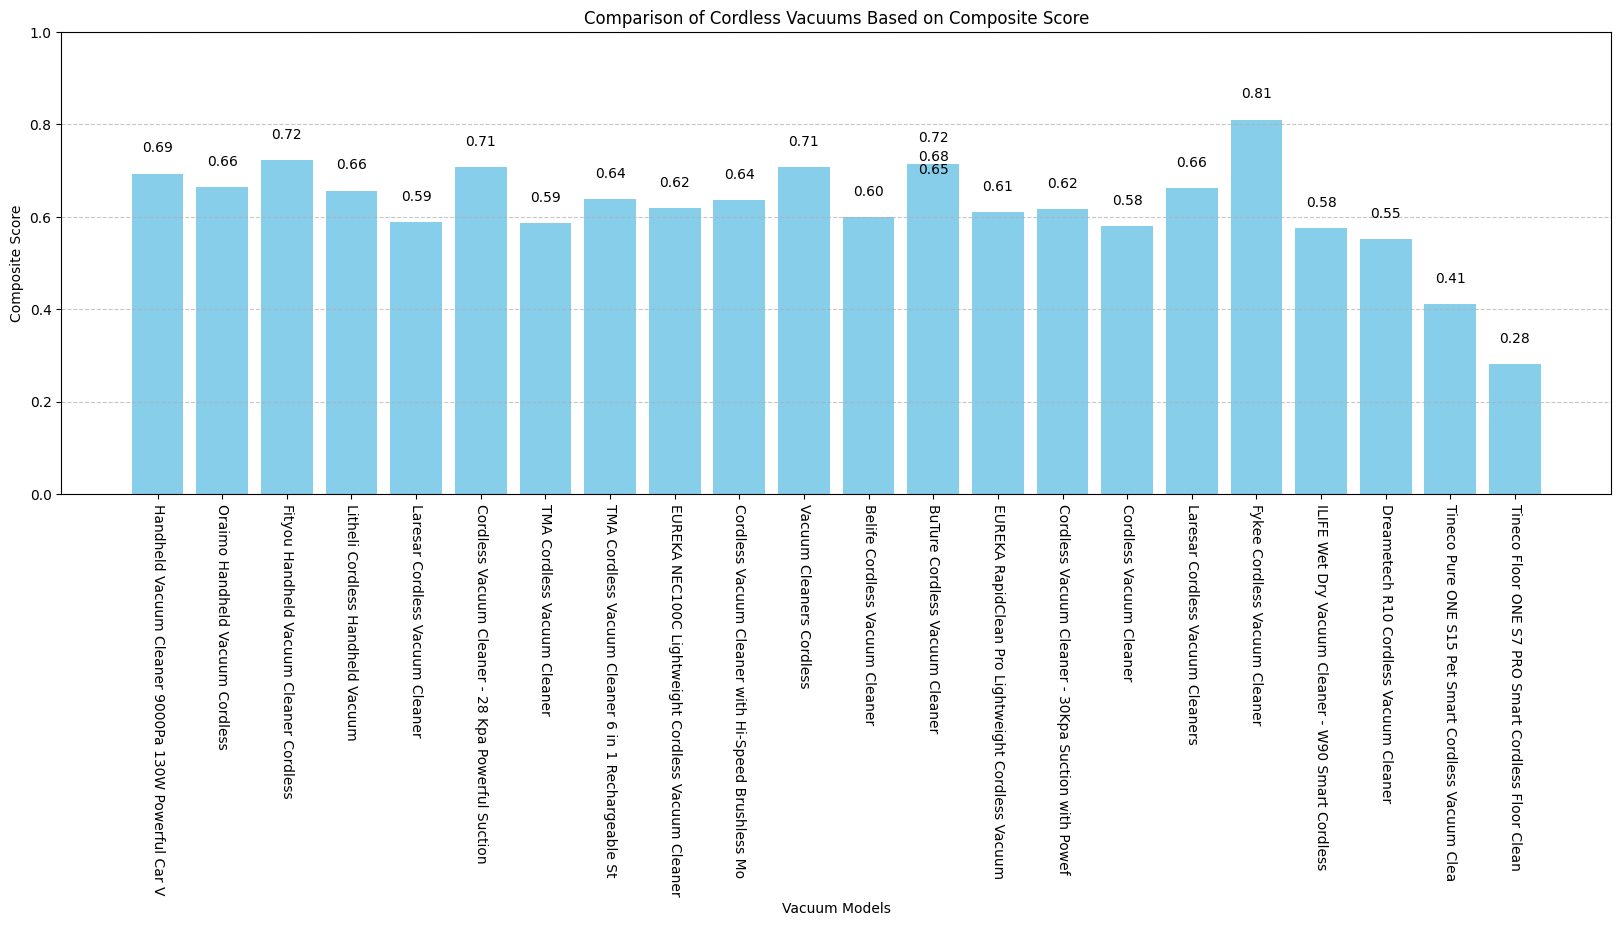

In [196]:
cordless_df = df[df['cordless'] == True]


# Adjustable weights (change these values according to your priorities)
Weight_Price = 0.4  # Weight for price
Weight_Discount = 0.3  # Weight for discount
Weight_Rating = 0.3  # Weight for user rating

# Normalize the price, discount rate, and user rating
max_price = cordless_df['product_discount_price'].max()  # Maximum price among all vacuum cleaners
max_discount_rate = cordless_df['discount_rate'].max()  # Maximum discount rate among all vacuum cleaners
max_rating = 5.0  # Maximum user rating among all vacuum cleaners

# normalized_price = price / max_price
# normalized_discount = discount_rate / max_discount_rate
# normalized_rating = user_rating / max_rating
# Calculate the composite score
composite_scores = [(Weight_Price * (1-price / max_price) + Weight_Discount * (1 - discount_rate / max_discount_rate) + Weight_Rating * user_rating / max_rating) /
 (Weight_Price + Weight_Discount + Weight_Rating) for price, user_rating, discount_rate in zip(cordless_df['product_discount_price'], cordless_df['product_rating'], cordless_df['discount_rate'])]

# Create a bar chart
plt.figure(figsize=(20, 6))
bars = plt.bar(cordless_df['product_title'], composite_scores, color='skyblue')
plt.xlabel('Vacuum Models')
plt.ylabel('Composite Score')
plt.title('Comparison of Cordless Vacuums Based on Composite Score')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xticks(rotation=270)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show detail
for bar, price, discount_rate, user_rating in zip(bars, cordless_df['product_discount_price'], cordless_df['discount_rate'], cordless_df['product_rating']):
    score = (Weight_Price * (1-price / max_price) + Weight_Discount * (1 - discount_rate / max_discount_rate) + Weight_Rating * user_rating / max_rating) /(Weight_Price + Weight_Discount + Weight_Rating)
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        score + 0.04,
        f'{score:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
    )

# Display the chart
plt.show()

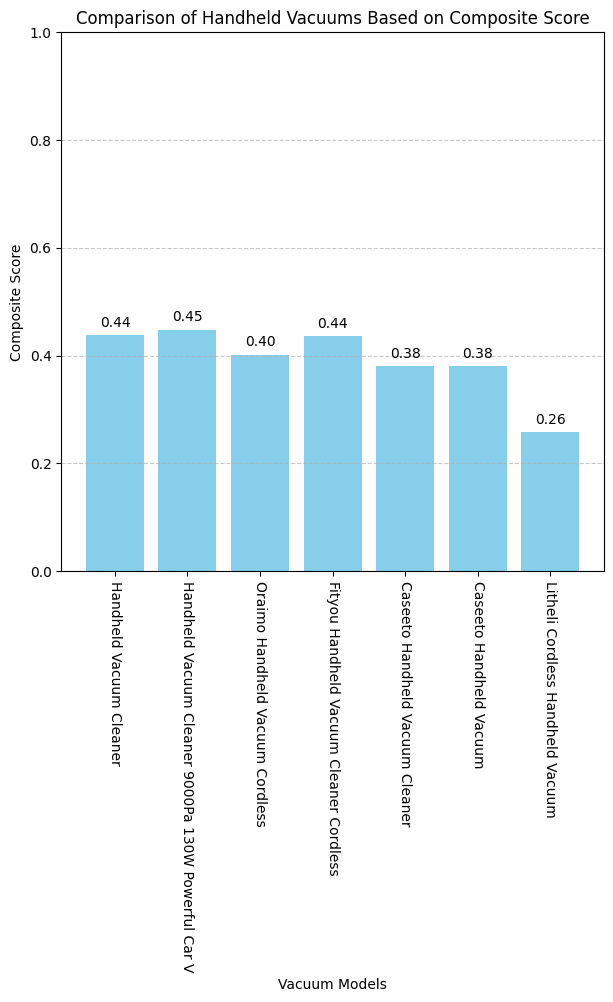

In [200]:
#handheld
handheld_df = df[df['handheld'] == True]

# Adjustable weights (change these values according to your priorities)
Weight_Price = 0.4  # Weight for price
Weight_Discount = 0.3  # Weight for discount
Weight_Rating = 0.3  # Weight for user rating

# Normalize the price, discount rate, and user rating
max_price = handheld_df['product_discount_price'].max()  # Maximum price among all vacuum cleaners
max_discount_rate = handheld_df['discount_rate'].max()  # Maximum discount rate among all vacuum cleaners
max_rating = 5.0  # Maximum user rating among all vacuum cleaners

# normalized_price = price / max_price
# normalized_discount = discount_rate / max_discount_rate
# normalized_rating = user_rating / max_rating
# Calculate the composite score
composite_scores = [(Weight_Price * (1-price / max_price) + Weight_Discount * (1 - discount_rate / max_discount_rate) + Weight_Rating * user_rating / max_rating) /
 (Weight_Price + Weight_Discount + Weight_Rating) for price, user_rating, discount_rate in zip(handheld_df['product_discount_price'], handheld_df['product_rating'], handheld_df['discount_rate'])]

# Create a bar chart
plt.figure(figsize=(7, 7))
bars = plt.bar(handheld_df['product_title'], composite_scores, color='skyblue')
plt.xlabel('Vacuum Models')
plt.ylabel('Composite Score')
plt.title('Comparison of Handheld Vacuums Based on Composite Score')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xticks(rotation=270)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show detail
for bar, price, discount_rate, user_rating in zip(bars, handheld_df['product_discount_price'], handheld_df['discount_rate'], handheld_df['product_rating']):
    score = (Weight_Price * (1-price / max_price) + Weight_Discount * (1 - discount_rate / max_discount_rate) + Weight_Rating * user_rating / max_rating) /(Weight_Price + Weight_Discount + Weight_Rating)
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        score + 0.01,
        f'{score:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
    )

# Display the chart
plt.show()

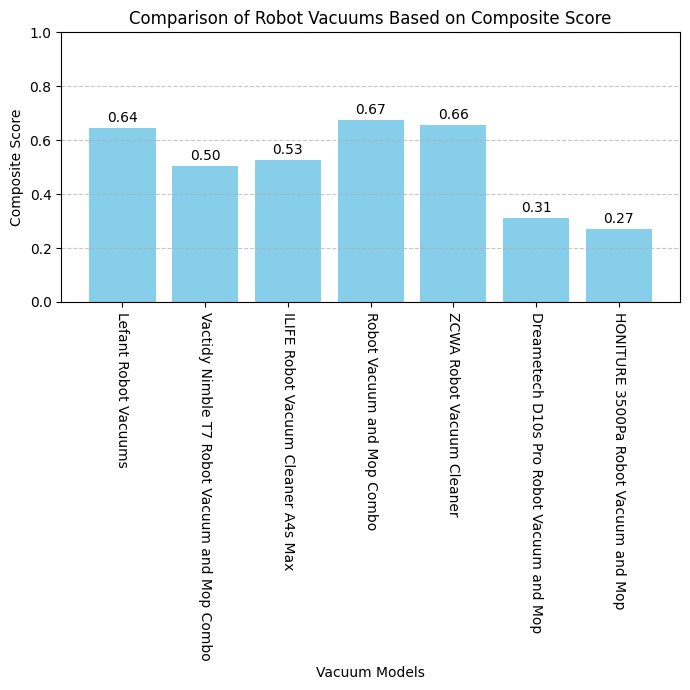

In [199]:
#Robot
robot_df = df[df['robot'] == True]

# Adjustable weights (change these values according to your priorities)
Weight_Price = 0.4  # Weight for price
Weight_Discount = 0.3  # Weight for discount
Weight_Rating = 0.3  # Weight for user rating

# Normalize the price, discount rate, and user rating
max_price = robot_df['product_discount_price'].max()  # Maximum price among all vacuum cleaners
max_discount_rate = robot_df['discount_rate'].max()  # Maximum discount rate among all vacuum cleaners
max_rating = 5.0  # Maximum user rating among all vacuum cleaners

# normalized_price = price / max_price
# normalized_discount = discount_rate / max_discount_rate
# normalized_rating = user_rating / max_rating
# Calculate the composite score
composite_scores = [(Weight_Price * (1-price / max_price) + Weight_Discount * (1 - discount_rate / max_discount_rate) + Weight_Rating * user_rating / max_rating) /
 (Weight_Price + Weight_Discount + Weight_Rating) for price, user_rating, discount_rate in zip(robot_df['product_discount_price'], robot_df['product_rating'], robot_df['discount_rate'])]

# Create a bar chart
plt.figure(figsize=(7, 7))
bars = plt.bar(robot_df['product_title'], composite_scores, color='skyblue')
plt.xlabel('Vacuum Models')
plt.ylabel('Composite Score')
plt.title('Comparison of Robot Vacuums Based on Composite Score')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.xticks(rotation=270)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show detail
for bar, price, discount_rate, user_rating in zip(bars, robot_df['product_discount_price'], robot_df['discount_rate'], robot_df['product_rating']):
    score = (Weight_Price * (1-price / max_price) + Weight_Discount * (1 - discount_rate / max_discount_rate) + Weight_Rating * user_rating / max_rating) /(Weight_Price + Weight_Discount + Weight_Rating)
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        score + 0.01,
        f'{score:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
    )


# Display the chart
plt.tight_layout()
plt.show()